In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('C:/Users/Thiago/Desktop/Potifolio/Projeto calculadora de imoveis/Data Sets/Model_input.csv')

In [3]:
X = df[["area_limpo", "Banheiro", "Quarto", "condominio", "Garagem"]]
y = df["preço"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [5]:
X.shape

(6592, 5)

In [6]:
X_train.shape

(5273, 5)

In [7]:
X_test.shape

(1319, 5)

In [8]:
y_train

1439     6799.0
3615     2600.0
6404     9500.0
4635     8900.0
4341     4500.0
         ...   
3497     2670.0
3492     1600.0
2177     4000.0
3557     1500.0
4578    14500.0
Name: preço, Length: 5273, dtype: float64

In [9]:
model = LinearRegression(fit_intercept=False)

In [10]:
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [12]:
np.mean(np.abs(y_train - y_pred_train)/y_train)

0.44974581038325884

In [13]:
np.mean(np.abs(y_test - y_pred_test)/y_test)

0.41080964188347274

In [16]:
r2_score(y_test, y_pred_test)

0.7200846687580622

# KNN

In [17]:
knn = KNeighborsRegressor(n_neighbors=5)

In [18]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
y_pred = knn.predict(X_test)

In [20]:
mean_absolute_percentage_error(y_test, y_pred)

0.38855783839940805

In [21]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_absolute_percentage_error(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.4330189788358123
k=3, mape=0.39267123797793513
k=5, mape=0.38855783839940805
k=7, mape=0.3826335395447816
k=9, mape=0.37815115401639526


In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [25]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_absolute_percentage_error(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.4385753069608725
k=3, mape=0.40724304583843096
k=5, mape=0.3945713252339315
k=7, mape=0.38907837675492624
k=9, mape=0.38410142253458923


In [26]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [27]:
novo_apto = pd.DataFrame([[60, 4, 2, 500, 1]], columns=X_train.columns)

In [28]:
novo_apto_scaled = scaler.transform(novo_apto)

In [29]:
knn.predict(novo_apto_scaled)

array([2233.33333333])

In [30]:
residuals = y_test - y_pred

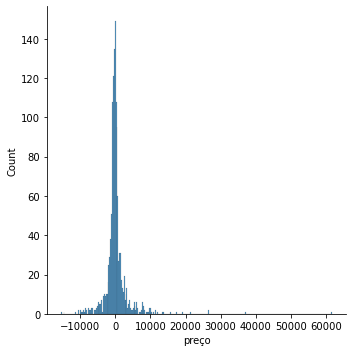

In [31]:
sns.displot(residuals)

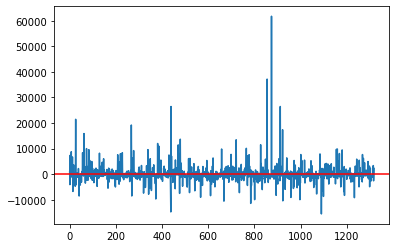

In [33]:
residuals_df = pd.DataFrame(residuals).reset_index(drop=True)
residuals_df["preço"].plot()
plt.axhline(y=0, c="r")

In [34]:
r2_score(y_test, y_pred)

0.6988991762971744

# Com Bairro

In [37]:
df = pd.read_csv('C:/Users/Thiago/Desktop/Potifolio/Projeto calculadora de imoveis/Data Sets/Model_input_with_crawlers.csv')
X = df[["area_limpo", "Banheiro", "Quarto", "condominio", "Garagem", "crawler"]]
y = df["preço"]

In [38]:
X = pd.concat((X,pd.get_dummies(X["crawler"])), axis=1).drop(columns=["crawler"])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.4034407642490306

106.64835751902443

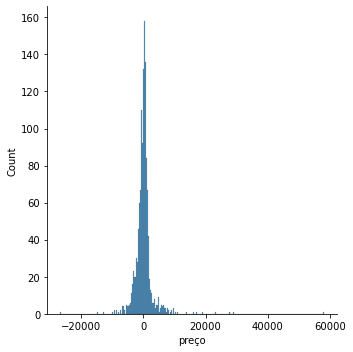

In [41]:
residuals = y_test - y_pred
sns.displot(residuals)
np.mean(residuals)

In [42]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [44]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_absolute_percentage_error(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.31759994155124543
k=3, mape=0.27563881967530707
k=5, mape=0.27024203083640497
k=7, mape=0.26989194844965103
k=9, mape=0.26485566036104


In [45]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
error = mean_absolute_percentage_error(y_test, y_pred)
residuals = y_test - y_pred

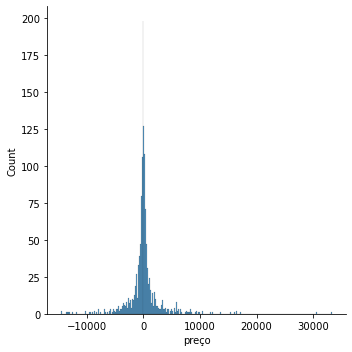

In [46]:
sns.displot(residuals)

In [47]:
r2_score(y_test, y_pred)

0.8008676714504179